In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Conv2D,Conv2DTranspose,Flatten,Reshape,RepeatVector,LSTM
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist
import numpy as np
def m_img_show(imgs,n_c=None):
  img_n_c=  n_c or len(imgs)
  img_n_r=(len(imgs)-1)//n_c+1
  if imgs.shape[-1]==1:
    imgs=imgs.squeeze(axis=-1)
  plt.figure(figsize=(img_n_c,img_n_r))
  for idx,im in enumerate(imgs):
    plt.subplot(img_n_r,img_n_c,idx+1)
    plt.imshow(im,cmap='binary')
    plt.axis('off')

오토인코더


In [ ]:
(tr_x, tr_y), (tt_x, tt_y) = fashion_mnist.load_data()
tr_x = tr_x.astype(np.float32) / 255
tt_x = tt_x.astype(np.float32) / 255

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0942 - val_loss: 0.0683
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0646 - val_loss: 0.0620
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0620 - val_loss: 0.0615
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - val_loss: 0.0614
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - val_loss: 0.0614
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - val_loss: 0.0614
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - val_loss: 0.0614
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - val_loss: 0.0615
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0618 - val_loss: 0.0615
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.061

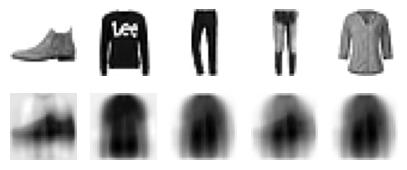

In [ ]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

ec = Sequential([
    Flatten(),
    Dense(2, activation="relu"),
])
dec = Sequential([
    Dense(28 * 28),
    Reshape([28, 28]),
])
ae = Sequential([ec, dec])

ae.compile(loss="mse", optimizer="adam")
hy = ae.fit(tr_x, tr_x, epochs=20,validation_data=(tt_x, tt_x))
g_img=ae.predict(tt_x[:5])
ck_img=np.concatenate([tt_x[:5],g_img],axis=0)
m_img_show(ck_img,5)
plt.show()

Epoch 1/20
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0556 - val_loss: 0.0493
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0485 - val_loss: 0.0476
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0470 - val_loss: 0.0467
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0463 - val_loss: 0.0459
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0456 - val_loss: 0.0457
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0447 - val_loss: 0.0444
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0472 - val_loss: 0.0440
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0438 - val_loss: 0.0471
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0440 - val_loss: 0.0425
Epoch 10/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.04

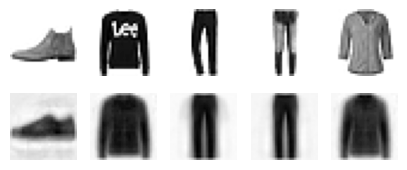

In [ ]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

ec = Sequential([
    Flatten(),
    Dense(100, activation="relu"),
    Dense(30, activation="relu"),
    Dense(2, activation="relu"),
])
dec = Sequential([
    Dense(30, activation="relu"),
    Dense(100, activation="relu"),
    Dense(28 * 28),
    Reshape([28, 28]),
])
ae = Sequential([ec, dec])

ae.compile(loss="mse", optimizer="adam")
hy = ae.fit(tr_x, tr_x, epochs=20,validation_data=(tt_x, tt_x))
g_img=ae.predict(tt_x[:5])
ck_img=np.concatenate([tt_x[:5],g_img],axis=0)
m_img_show(ck_img,5)
plt.show()

합성곱 오토인코더

Epoch 1/20
1875/1875 [==============================] - 24s 6ms/step - loss: 0.0136 - val_loss: 0.0068
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0055 - val_loss: 0.0047
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

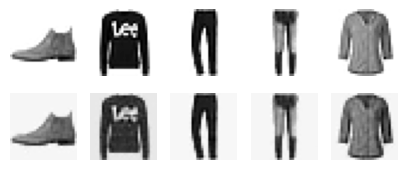

In [ ]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

ec = Sequential([
    Reshape([28, 28, 1]),
    Conv2D(16, 3,2, padding="same", activation="relu"),# 출력: 14 × 14 x 16
    Conv2D(32, 3,2, padding="same", activation="relu"),# 출력: 7 × 7 x 32
    Conv2D(64, 3,2, padding="same", activation="relu"),# 출력: 3 × 3 x 64
    Flatten()
])
dec = Sequential([
    Dense(3 * 3 * 64),
    Reshape((3, 3, 64)),
    Conv2DTranspose(32, 3, 2, activation="relu"),
    Conv2DTranspose(16, 3, 2, padding="same",activation="relu"),
    Conv2DTranspose(1, 3, 2, padding="same"),
    Reshape([28, 28])
])
ae = Sequential([ec, dec])

ae.compile(loss="mse", optimizer="adam")
hy = ae.fit(tr_x, tr_x, epochs=20,validation_data=(tt_x, tt_x))
g_img=ae.predict(tt_x[:5])
ck_img=np.concatenate([tt_x[:5],g_img],axis=0)
m_img_show(ck_img,5)
plt.show()

Epoch 1/20
1875/1875 [==============================] - 33s 12ms/step - loss: 0.0263 - val_loss: 0.0190
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0174 - val_loss: 0.0160
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0153 - val_loss: 0.0146
Epoch 4/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0139 - val_loss: 0.0136
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0130 - val_loss: 0.0129
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0118 - val_loss: 0.0117
Epoch 8/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 9/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 10/20
1875/1875 [==============================] - 20s 11m

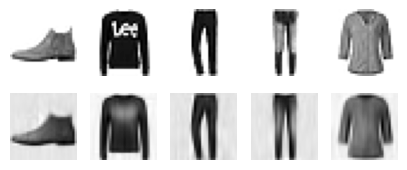

In [ ]:
tf.random.set_seed(42)  # 추가 코드 - CPU에서 재현성 보장

ec = Sequential([
    LSTM(100, return_sequences=True),
    LSTM(30)
])
dec = Sequential([
    RepeatVector(28),
    LSTM(100, return_sequences=True),
    Dense(28)
])
ae = Sequential([ec, dec])

ae.compile(loss="mse", optimizer="adam")
hy = ae.fit(tr_x, tr_x, epochs=20,validation_data=(tt_x, tt_x))
g_img=ae.predict(tt_x[:5])
ck_img=np.concatenate([tt_x[:5],g_img],axis=0)
m_img_show(ck_img,5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Conv2D,Conv2DTranspose,Flatten,Reshape,RepeatVector,LSTM
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist,mnist
import numpy as np

In [ ]:
(tr_x, tr_y), (tt_x, tt_y) = mnist.load_data()
tr_x1 = tr_x.astype(np.float32) / 255
tt_x1 = tt_x.astype(np.float32) / 255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
(tr_x, tr_y), (tt_x, tt_y) = fashion_mnist.load_data()
tr_x = tr_x.astype(np.float32) / 255
tt_x = tt_x.astype(np.float32) / 255

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
ck_x=tt_x[:100]#입력 데이터(원본)
ck_x1=tt_x1[:100]#입력 데이터(거짓)
ck_y=np.array([[1]]*100)#정답<판별내용>(참)
ck_y1=np.array([[0]]*100)#정답<판별내용>(거짓)

In [ ]:
ck_y1.shape

(100, 1)

In [ ]:
ck_tr_x=np.concatenate([ck_x,ck_x1],axis=0)
ck_tr_y=np.concatenate([ck_y,ck_y1],axis=0)

In [ ]:
ck_tr_x.shape,ck_tr_y.shape

((200, 28, 28), (200, 1))

GAN

판별자

In [ ]:
di_m = Sequential([
    Flatten(),#입력
    Dense(200,activation='relu'),#은닉
    Dense(100,activation='relu'),
    Dense(1,activation='sigmoid'),#출력
])

생성자

In [ ]:
g_m = Sequential([
    Dense(100,activation='relu'),
    Dense(200,activation='relu'),
    Dense(28*28,activation='relu'),
    Reshape([28,28]),
])

통합

In [ ]:
gan_m=Sequential([g_m,di_m])

학습

In [ ]:
#1.판별자
di_m.compile(loss='binary_crossentropy',metrics='acc')
#2.생성자
di_m.trainable=False
gan_m.compile(loss='binary_crossentropy')

In [ ]:
ep=10
bc_size=32
c_size=100

In [ ]:
(tr_x, tr_y), (tt_x, tt_y) = fashion_mnist.load_data()
tr_x = tr_x.astype(np.float32) / 255
tt_x = tt_x.astype(np.float32) / 255
dataset=tf.data.Dataset.from_tensor_slices(tr_x).shuffle(1000)
dataset=dataset.batch(bc_size,drop_remainder=True).prefetch(1)

In [ ]:
for i in range(1,ep+1):
  for re_img in dataset:
    #1.판별자 학습
    re_y=np.array([[1.]]*32)

    z=np.random.normal(0,1,(bc_size,c_size))
    g_img=g_m(z)
    g_y=np.array([[0.]]*32)
    re_loss = di_m.train_on_batch(re_img,re_y)#정답공부
    g_loss = di_m.train_on_batch(g_img,g_y)#오답공부
    D_loss = (re_loss[0]+g_loss[0])*0.5
    D_acc=(re_loss[1]+g_loss[1])*0.5

    #2.생성자 학습
    z=np.random.normal(0,1,(bc_size,c_size))
    g_y=np.array([[1.]]*32)
    G_loss=gan_m.train_on_batch(z,g_y)
  print(f'D_loss:{D_loss},D_acc:{D_acc},G_loss:{G_loss}')
  m_img_show(g_img,8)
  plt.show()



In [ ]:
idx=np.random.randint(0,60000,32)
re_img=tr_x[idx]
re_y=np.array([[1.]]*32)
re_img.shape,re_y.shape

((32, 28, 28), (32, 1))

In [ ]:
z=np.random.normal(0,1,(32,100))
z.shape

(32, 100)

In [ ]:
g_img=g_m(z).numpy()
g_y=np.array([[0.]]*32)
g_img.shape,g_y.shape

((32, 28, 28), (32, 1))

In [ ]:
re_loss = di_m.train_on_batch(re_img,re_y)#정답공부
g_loss = di_m.train_on_batch(g_img,g_y)#오답공부
all_loss = (re_loss+g_loss)*0.5

DCGAN

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Conv2D,Conv2DTranspose,Flatten,Reshape,RepeatVector,LSTM,LeakyReLU,Dropout
from keras.optimizers import Adam
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist,mnist,cifar10
import numpy as np

In [ ]:
(tr_x, tr_y), (tt_x, tt_y) = cifar10.load_data()

In [ ]:
data=tr_x[np.isin(tr_y.reshape(50000),[1])]#1개도출
data = (data.astype(np.float32) / 255.)*2.-1.

In [ ]:
ep = 200
bc_size = 128
c_size = 100  #(zdim)

판별자

In [ ]:
def make_di_m(in_shape):
  m=Sequential([
      Conv2D(64,3,padding='same',activation=LeakyReLU(0.2),input_shape=in_shape),
      Conv2D(128,3,2,padding='same',activation=LeakyReLU(0.2)),
      Conv2D(128,3,2,padding='same',activation=LeakyReLU(0.2)),
      Conv2D(256,3,2,padding='same',activation=LeakyReLU(0.2)),
      Flatten(),
      Dropout(0.4),
      Dense(1,activation='sigmoid')
  ])
  m.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0002,beta_1=0.5),metrics='acc')
  return m

생성자

In [ ]:
def make_g_m(c_size):
  m=Sequential([
      Dense(4*4*256,activation=LeakyReLU(0.2),input_dim=c_size),
      Reshape((4,4,256)),#4,4
      Conv2DTranspose(128,4,2,padding='same',activation=LeakyReLU(0.2)),#8,8
      Conv2DTranspose(128,4,2,padding='same',activation=LeakyReLU(0.2)),#16,16
      Conv2DTranspose(128,4,2,padding='same',activation=LeakyReLU(0.2)),#32,32
      Conv2D(3,3,padding='same',activation='tanh')
  ])
  return m

통합

In [ ]:
def make_gan_m(G,D):
  D.trainable=False
  m=Sequential(
      [G,D]
  )
  m.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0002,beta_1=0.5))
  return m

학습

In [ ]:
#학습용 원본 이미지 도출
def g_re_img(data,bc_size):
  idx = np.random.randint(0,data.shape[0],bc_size)
  x = data[idx]
  y = np.ones((bc_size,1))
  return x,y

#학습용 생성 이미지 도출
def g_g_img(G,c_size,bc_size):
  z = np.random.randn(bc_size,c_size)
  x = G.predict(z,verbose=0)
  y = np.zeros((bc_size,1))
  return x,y

In [ ]:
def train(G,D,GAN,data,c_size,bc_size,ep,v=0):
  n_bc=int(data.shape[0]/bc_size)
  for i in range(1,ep+1):
    for bc in range(n_bc):
      #1. 판별자 학습
      re_x,re_y=g_re_img(data,bc_size//2)
      d_loss1 = D.train_on_batch(re_x,re_y)
      g_x,g_y=g_g_img(G,c_size,bc_size//2)
      d_loss2 = D.train_on_batch(g_x,g_y)

      #2. 생성자 학습
      z = np.random.randn(bc_size,c_size)
      gn_y = np.ones((bc_size,1))
      g_loss = GAN.train_on_batch(z,gn_y)

    if v==1:
      print(f"{i}회: 판별_loss(re):{d_loss1[0]}, 판별_loss(g):{d_loss2[0]},GAN_loss:{g_loss}")
    if i%10==0:
      plt.figure(figsize=(20,2))
      plt.suptitle(f"E:{i}")
      ck_x,ck_y=g_g_img(G,c_size,10)
      for n in range(10):
        plt.subplot(1,10,n+1)
        plt.imshow((ck_x[n]+1)/2.0,cmap='gray')
        plt.axis('off')
      plt.show()

main

In [ ]:
D = make_di_m((32,32,3))
G = make_g_m(c_size)
GAN = make_gan_m(G,D)
train(G,D,GAN,data,c_size,bc_size,ep,1)

CGAN

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Conv2D,Conv2DTranspose,Flatten,Reshape,LeakyReLU,Dropout,Input,Concatenate,Multiply,Embedding
from keras.optimizers import Adam
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist,mnist,cifar10
import numpy as np

In [ ]:
(tr_x, tr_y), (tt_x, tt_y) = mnist.load_data()

In [ ]:
data = ((tt_x.astype(np.float32) / 255.)*2.-1.).reshape(-1,28,28,1)
label=tt_y

In [ ]:
data.shape,label.shape

((10000, 28, 28, 1), (10000,))

In [ ]:
data.min(),data.max()

(-1.0, 1.0)

In [ ]:
ep = 200
bc_size = 32
c_size = 100  #(zdim)
n_class = 10
in_shape=data.shape[1:]

판별자

In [ ]:
def make_di_m(in_shape):
  m=Sequential([
      Conv2D(64,3,padding='same',activation=LeakyReLU(0.2),input_shape=(in_shape[0],in_shape[1],in_shape[2]*2)),
      Conv2D(128,3,2,padding='same',activation=LeakyReLU(0.2)),
      Conv2D(128,3,2,padding='same',activation=LeakyReLU(0.2)),
      Conv2D(256,3,2,padding='same',activation=LeakyReLU(0.2)),
      Flatten(),
      Dropout(0.4),
      Dense(1,activation='sigmoid')
  ])
  return m

In [ ]:
def make_cgan_di_m(in_shape,n_class):
  img = Input(shape=in_shape)
  label = Input(shape=(1,),dtype='int32')
  label_embedding = Embedding(n_class,np.prod(in_shape),input_length=1)(label)
  label_embedding = Flatten()(label_embedding)
  label_embedding = Reshape(in_shape)(label_embedding)
  c_img = Concatenate(axis = -1)([img,label_embedding])
  di_m = make_di_m(in_shape)
  out = di_m(c_img)
  m = Model([img,label],out)
  m.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0002,beta_1=0.5),metrics='acc')
  return m

In [ ]:
make_cgan_di_m(in_shape,n_class)

생성자

In [ ]:
def make_g_m(c_size):
  m=Sequential([
      Dense(7*7*256,activation=LeakyReLU(0.2),input_dim=c_size),
      Reshape((7,7,256)),#7,7
      Conv2DTranspose(128,4,2,padding='same',activation=LeakyReLU(0.2)),#14,14
      Conv2DTranspose(128,4,2,padding='same',activation=LeakyReLU(0.2)),#28,28
      Conv2D(1,3,padding='same',activation='tanh')
  ])
  return m

In [ ]:
def make_cgan_g_m(c_size):
  z = Input(shape=(c_size,))
  label = Input(shape=(1,),dtype='int32')
  label_embedding = Embedding(n_class,c_size,input_length=1)(label)
  label_embedding = Flatten()(label_embedding)
  j_z = Multiply()([z,label_embedding])

  g_m=make_g_m(c_size)
  out = g_m(j_z)
  m = Model([z,label],out)
  return m

통합

In [ ]:
def make_cgan_m(G,D,c_size):
  z = Input(shape=(c_size,))
  label = Input(shape=(1,))
  img = G([z,label])
  out = D([img,label])
  D.trainable=False
  m = Model([z,label],out)
  m.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0002,beta_1=0.5))
  return m

In [ ]:
D = make_cgan_di_m(in_shape,n_class)
G = make_cgan_g_m(c_size)

학습

In [ ]:
#학습용 원본 이미지 도출
def g_re_img(data,bc_size,label):
  idx = np.random.randint(0,data.shape[0],bc_size)
  x = data[idx]
  y = np.ones((bc_size,1))
  l = label[idx]
  return x,y,l

#학습용 생성 이미지 도출
def g_g_img(G,c_size,bc_size,l):
  z = np.random.randn(bc_size,c_size)
  x = G.predict([z,l],verbose=0)
  y = np.zeros((bc_size,1))
  return x,y,l

In [ ]:
def train(G,D,GAN,data,label,c_size,bc_size,ep,v=0):
  n_bc=int(data.shape[0]/bc_size)
  for i in range(1,ep+1):
    for bc in range(n_bc):
      print(f'{bc+1}/{n_bc}')
      #1. 판별자 학습
      re_x,re_y,l=g_re_img(data,bc_size//2,label)
      d_loss1 = D.train_on_batch([re_x,l],re_y)
      g_x,g_y,l=g_g_img(G,c_size,bc_size//2,l)
      print(g_x.shape,g_y.shape,l.shape)
      d_loss2 = D.train_on_batch([g_x,l],g_y)

      #2. 생성자 학습
      z = np.random.randn(bc_size,c_size)
      gn_y = np.ones((bc_size,1))
      ck_label = np.random.randint(0,n_class,bc_size)
      g_loss = GAN.train_on_batch([z,ck_label],gn_y)

    if v==1:
      print(f"{i}회: 판별_loss(re):{d_loss1[0]}, 판별_loss(g):{d_loss2[0]},GAN_loss:{g_loss}")
    if i%10==0:
      plt.figure(figsize=(20,2))
      plt.suptitle(f"E:{i}")
      ck_x,ck_y=g_g_img(G,c_size,10)
      for n in range(10):
        plt.subplot(1,10,n+1)
        plt.imshow((ck_x[n]+1)/2.0,cmap='gray')
        plt.axis('off')
      plt.show()

동작

In [ ]:
#ep = 200
#bc_size = 32
#c_size = 100  #(zdim)
#n_class = 10
#in_shape=data.shape[1:]

In [ ]:
D = make_cgan_di_m(in_shape,n_class)
G = make_cgan_g_m(c_size)
GAN = make_cgan_m(G,D,c_size)
train(G,D,GAN,data,label,c_size,bc_size,ep,1)

Q1. 2개의 클래스로 CGAN을 구현 하시오.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,Conv2D,Conv2DTranspose,Flatten,Reshape,LeakyReLU,Dropout,Input,Concatenate,Multiply,Embedding
from keras.optimizers import Adam
from keras.models import Model,Sequential
from keras.datasets import fashion_mnist,mnist,cifar10
import numpy as np

In [ ]:
(tr_x, tr_y), (tt_x, tt_y) = mnist.load_data()

In [ ]:
tr_x.shape, tr_y.shape, tt_x.shape, tt_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
data = ((tt_x.astype(np.float32) / 255.)*2.-1.).reshape(-1,28,28,1)
label=tt_y

data = data[label == 0]
label = label[label == 0]

In [ ]:
data.shape, label.shape

((980, 28, 28, 1), (980,))

In [ ]:
ep = 200
bc_size = 980
c_size = 100  #(zdim)
n_class = 10
in_shape=data.shape[1:]

In [ ]:
def make_di_m(in_shape):
  m=Sequential([
      Conv2D(64,3,padding='same',activation=LeakyReLU(0.2),input_shape=(in_shape[0],in_shape[1],in_shape[2]*2)),
      Conv2D(128,3,2,padding='same',activation=LeakyReLU(0.2)),
      Conv2D(128,3,2,padding='same',activation=LeakyReLU(0.2)),
      Conv2D(256,3,2,padding='same',activation=LeakyReLU(0.2)),
      Flatten(),
      Dropout(0.4),
      Dense(1,activation='sigmoid')
  ])
  return m

In [ ]:
def make_cgan_di_m(in_shape,n_class):
  img = Input(shape=in_shape)
  label = Input(shape=(1,),dtype='int32')
  label_embedding = Embedding(n_class,np.prod(in_shape),input_length=1)(label)
  label_embedding = Flatten()(label_embedding)
  label_embedding = Reshape(in_shape)(label_embedding)
  c_img = Concatenate(axis = -1)([img,label_embedding])
  di_m = make_di_m(in_shape)
  out = di_m(c_img)
  m = Model([img,label],out)
  m.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0002,beta_1=0.5),metrics='acc')
  return m

In [ ]:
def make_g_m(c_size):
  m=Sequential([
      Dense(7*7*256,activation=LeakyReLU(0.2),input_dim=c_size),
      Reshape((7,7,256)),#7,7
      Conv2DTranspose(128,4,2,padding='same',activation=LeakyReLU(0.2)),#14,14
      Conv2DTranspose(128,4,2,padding='same',activation=LeakyReLU(0.2)),#28,28
      Conv2D(1,3,padding='same',activation='tanh')
  ])
  return m

In [ ]:
def make_cgan_g_m(c_size):
  z = Input(shape=(c_size,))
  label = Input(shape=(1,),dtype='int32')
  label_embedding = Embedding(n_class,c_size,input_length=1)(label)
  label_embedding = Flatten()(label_embedding)
  j_z = Multiply()([z,label_embedding])

  g_m=make_g_m(c_size)
  out = g_m(j_z)
  m = Model([z,label],out)
  return m

In [ ]:
def make_cgan_m(G,D,c_size):
  z = Input(shape=(c_size,))
  label = Input(shape=(1,))
  img = G([z,label])
  out = D([img,label])
  D.trainable=False
  m = Model([z,label],out)
  m.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0002,beta_1=0.5))
  return m

In [ ]:
#학습용 원본 이미지 도출
def g_re_img(data,bc_size,label):
  idx = np.random.randint(0,data.shape[0],bc_size)
  x = data[idx]
  y = np.ones((bc_size,1))
  l = label[idx]
  return x,y,l

#학습용 생성 이미지 도출
def g_g_img(G, c_size, bc_size, l):
  z = np.random.randn(bc_size, c_size)
  x = G.predict([z,l], verbose=0)
  y = np.zeros((bc_size, 1))
  return x, y, l

In [ ]:
def train(G, D, GAN, data, label, c_size, bc_size, ep, v=0):
    n_bc = int(data.shape[0] / bc_size)
    for i in range(1, ep + 1):
        for bc in range(n_bc):
            re_x, re_y, l = g_re_img(data, bc_size, label)
            d_loss1 = D.train_on_batch([re_x, l], re_y)
            g_x, g_y, l = g_g_img(G, c_size, bc_size, label)
            d_loss2 = D.train_on_batch([g_x, l], g_y)

            z = np.random.randn(bc_size, c_size)
            gn_y = np.ones((bc_size, 1))
            ck_label = np.zeros_like(label)  # 클래스 0번을 나타내는 값으로 수정
            g_loss = GAN.train_on_batch([z, ck_label], gn_y)

        if v == 1:
            print(f"{i}회: 판별_loss(re):{d_loss1[0]}, 판별_loss(g):{d_loss2[0]}, GAN_loss:{g_loss}")
        if i % 10 == 0:
            plt.figure(figsize=(20, 2))
            plt.suptitle(f"E:{i}")
            ck_x, ck_y, _ = g_g_img(G, c_size, 10, np.zeros(10))  # 클래스 0번을 사용
            for n in range(10):
                plt.subplot(1, 10, n + 1)
                plt.imshow((ck_x[n] + 1) / 2.0, cmap='gray')
                plt.axis('off')
            plt.show()

1회: 판별_loss(re):0.6890462040901184, 판별_loss(g):0.6958836913108826, GAN_loss:0.6915875673294067
2회: 판별_loss(re):0.5531314611434937, 판별_loss(g):0.6961920857429504, GAN_loss:0.6912998557090759
3회: 판별_loss(re):0.4314069449901581, 판별_loss(g):0.6971933841705322, GAN_loss:0.690712571144104
4회: 판별_loss(re):0.2960678040981293, 판별_loss(g):0.6990432143211365, GAN_loss:0.689777672290802
5회: 판별_loss(re):0.17157262563705444, 판별_loss(g):0.7011601328849792, GAN_loss:0.6891341209411621
6회: 판별_loss(re):0.0867827981710434, 판별_loss(g):0.7032538056373596, GAN_loss:0.6892449259757996
7회: 판별_loss(re):0.04393237456679344, 판별_loss(g):0.7061665654182434, GAN_loss:0.6888510584831238
8회: 판별_loss(re):0.026212554425001144, 판별_loss(g):0.7122530341148376, GAN_loss:0.6854507327079773
9회: 판별_loss(re):0.01885802298784256, 판별_loss(g):0.7243881821632385, GAN_loss:0.6766203045845032
10회: 판별_loss(re):0.017097651958465576, 판별_loss(g):0.7436946034431458, GAN_loss:0.6637365818023682


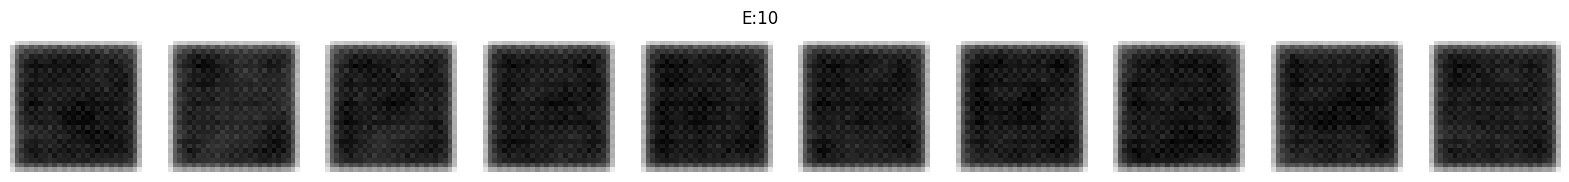

11회: 판별_loss(re):0.017946159467101097, 판별_loss(g):0.7669154405593872, GAN_loss:0.6508485078811646
12회: 판별_loss(re):0.023510795086622238, 판별_loss(g):0.7856914401054382, GAN_loss:0.6461723446846008
13회: 판별_loss(re):0.0353250578045845, 판별_loss(g):0.7904601693153381, GAN_loss:0.6548475027084351
14회: 판별_loss(re):0.05472497642040253, 판별_loss(g):0.7785994410514832, GAN_loss:0.6769683361053467
15회: 판별_loss(re):0.07419337332248688, 판별_loss(g):0.7513036727905273, GAN_loss:0.7135468125343323
16회: 판별_loss(re):0.0852755457162857, 판별_loss(g):0.710490345954895, GAN_loss:0.7641739845275879
17회: 판별_loss(re):0.09042263776063919, 판별_loss(g):0.6608937382698059, GAN_loss:0.8260668516159058
18회: 판별_loss(re):0.08195891976356506, 판별_loss(g):0.6104516386985779, GAN_loss:0.8994081616401672
19회: 판별_loss(re):0.07181201130151749, 판별_loss(g):0.5571802258491516, GAN_loss:0.9606078863143921
20회: 판별_loss(re):0.0633539929986, 판별_loss(g):0.5297324657440186, GAN_loss:0.9920555949211121


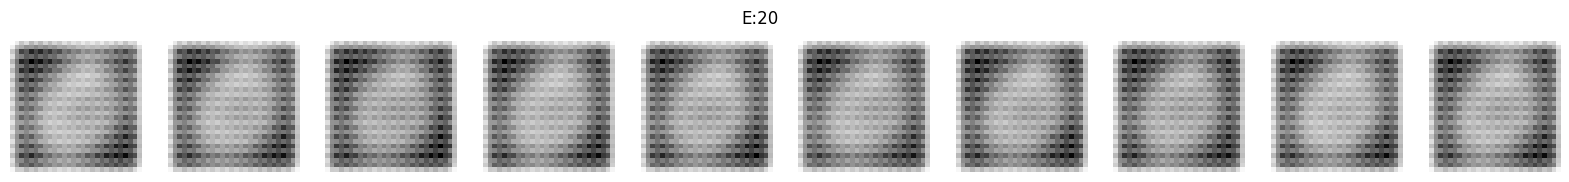

21회: 판별_loss(re):0.047524597495794296, 판별_loss(g):0.5136527419090271, GAN_loss:1.0039070844650269
22회: 판별_loss(re):0.041773561388254166, 판별_loss(g):0.5075939297676086, GAN_loss:0.9935570955276489
23회: 판별_loss(re):0.034019146114587784, 판별_loss(g):0.5094051361083984, GAN_loss:0.9794673919677734
24회: 판별_loss(re):0.014559859409928322, 판별_loss(g):0.5019693970680237, GAN_loss:0.9919384717941284
25회: 판별_loss(re):0.016271036118268967, 판별_loss(g):0.49381202459335327, GAN_loss:1.0066065788269043
26회: 판별_loss(re):0.01678464375436306, 판별_loss(g):0.47895610332489014, GAN_loss:1.0313547849655151
27회: 판별_loss(re):0.008251470513641834, 판별_loss(g):0.45088082551956177, GAN_loss:1.0958424806594849
28회: 판별_loss(re):0.003624136559665203, 판별_loss(g):0.40705716609954834, GAN_loss:1.2014929056167603
29회: 판별_loss(re):0.004655997734516859, 판별_loss(g):0.35044243931770325, GAN_loss:1.3565753698349
30회: 판별_loss(re):0.004248396493494511, 판별_loss(g):0.2851707637310028, GAN_loss:1.5728869438171387


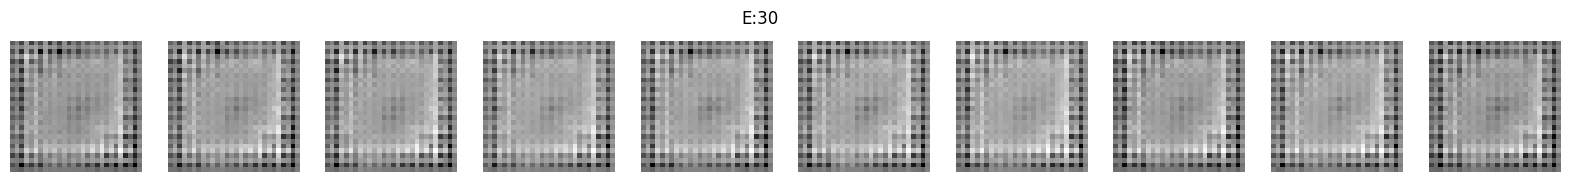

31회: 판별_loss(re):0.003380957990884781, 판별_loss(g):0.2173922210931778, GAN_loss:1.8724242448806763
32회: 판별_loss(re):0.0021837532985955477, 판별_loss(g):0.15234191715717316, GAN_loss:2.2546212673187256
33회: 판별_loss(re):0.0026868749409914017, 판별_loss(g):0.09879843890666962, GAN_loss:2.7036750316619873
34회: 판별_loss(re):0.0010844648350030184, 판별_loss(g):0.06054721027612686, GAN_loss:3.203084707260132
35회: 판별_loss(re):0.0007997263455763459, 판별_loss(g):0.03585970401763916, GAN_loss:3.701106071472168
36회: 판별_loss(re):0.0005991332582198083, 판별_loss(g):0.022218454629182816, GAN_loss:4.109158992767334
37회: 판별_loss(re):0.0005381149239838123, 판별_loss(g):0.016434483230113983, GAN_loss:4.345313549041748
38회: 판별_loss(re):0.0003688146825879812, 판별_loss(g):0.01416073553264141, GAN_loss:4.420463562011719
39회: 판별_loss(re):0.0004186445730738342, 판별_loss(g):0.014087725430727005, GAN_loss:4.438858509063721
40회: 판별_loss(re):0.0005229300004430115, 판별_loss(g):0.014651325531303883, GAN_loss:4.41023588180542


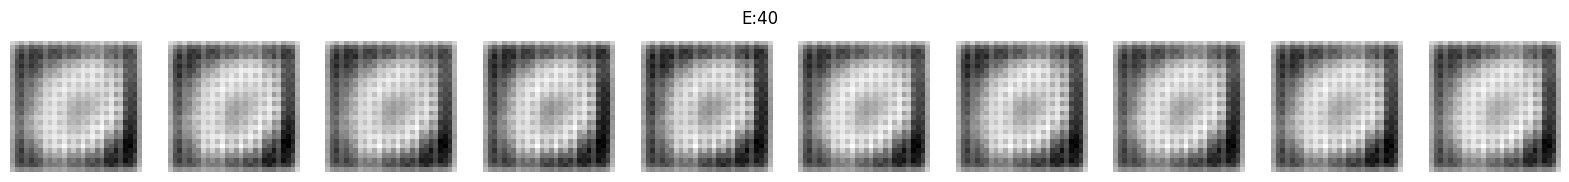

41회: 판별_loss(re):0.0005229315720498562, 판별_loss(g):0.017263248562812805, GAN_loss:4.354104995727539
42회: 판별_loss(re):0.0008261997136287391, 판별_loss(g):0.02340177819132805, GAN_loss:4.44580078125
43회: 판별_loss(re):0.005434972234070301, 판별_loss(g):0.0377504862844944, GAN_loss:5.272576332092285
44회: 판별_loss(re):0.09581705182790756, 판별_loss(g):2.5823287963867188, GAN_loss:5.333125114440918
45회: 판별_loss(re):0.05237342044711113, 판별_loss(g):0.0006905819172970951, GAN_loss:8.316003799438477
46회: 판별_loss(re):2.0778956413269043, 판별_loss(g):0.3339567482471466, GAN_loss:0.49590709805488586
47회: 판별_loss(re):2.503223640815122e-06, 판별_loss(g):1.6767792701721191, GAN_loss:0.7648301720619202
48회: 판별_loss(re):1.2758020602632314e-05, 판별_loss(g):0.6129196882247925, GAN_loss:1.7037736177444458
49회: 판별_loss(re):0.00017764298536349088, 판별_loss(g):0.17772717773914337, GAN_loss:2.563962459564209
50회: 판별_loss(re):0.0008573185186833143, 판별_loss(g):0.07413316518068314, GAN_loss:3.190748453140259


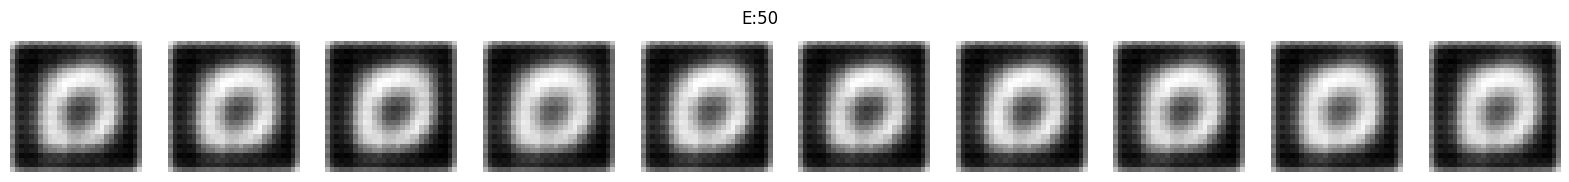

51회: 판별_loss(re):0.002189779421314597, 판별_loss(g):0.04083138704299927, GAN_loss:3.6222622394561768
52회: 판별_loss(re):0.003619337920099497, 판별_loss(g):0.026715772226452827, GAN_loss:3.964402198791504
53회: 판별_loss(re):0.006401469931006432, 판별_loss(g):0.019886231049895287, GAN_loss:4.173965930938721
54회: 판별_loss(re):0.004828551318496466, 판별_loss(g):0.0161715317517519, GAN_loss:4.35405969619751
55회: 판별_loss(re):0.007479162886738777, 판별_loss(g):0.014054888859391212, GAN_loss:4.470126628875732
56회: 판별_loss(re):0.006936842575669289, 판별_loss(g):0.012740392237901688, GAN_loss:4.517883777618408
57회: 판별_loss(re):0.009622455574572086, 판별_loss(g):0.01283998042345047, GAN_loss:4.531534194946289
58회: 판별_loss(re):0.0066153439693152905, 판별_loss(g):0.013051425106823444, GAN_loss:4.516820430755615
59회: 판별_loss(re):0.008493497967720032, 판별_loss(g):0.014040335081517696, GAN_loss:4.429437160491943
60회: 판별_loss(re):0.012353392317891121, 판별_loss(g):0.018002495169639587, GAN_loss:4.238112926483154


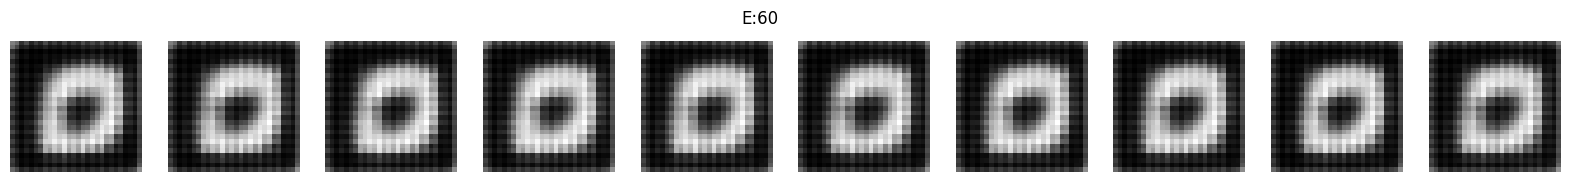

61회: 판별_loss(re):0.012469141744077206, 판별_loss(g):0.030744872987270355, GAN_loss:3.818497657775879
62회: 판별_loss(re):0.015149946324527264, 판별_loss(g):0.10123991966247559, GAN_loss:3.2729921340942383
63회: 판별_loss(re):0.03477676212787628, 판별_loss(g):0.4433581233024597, GAN_loss:3.8882241249084473
64회: 판별_loss(re):0.2552545368671417, 판별_loss(g):0.36811360716819763, GAN_loss:3.7478175163269043
65회: 판별_loss(re):0.6249712109565735, 판별_loss(g):0.7944135665893555, GAN_loss:3.355489730834961
66회: 판별_loss(re):0.4736884534358978, 판별_loss(g):0.2648675739765167, GAN_loss:3.0681188106536865
67회: 판별_loss(re):0.1380760818719864, 판별_loss(g):0.15179230272769928, GAN_loss:3.4109652042388916
68회: 판별_loss(re):0.0987267792224884, 판별_loss(g):0.09615296870470047, GAN_loss:3.6428520679473877
69회: 판별_loss(re):0.09536169469356537, 판별_loss(g):0.08729179948568344, GAN_loss:3.7593181133270264
70회: 판별_loss(re):0.07901407033205032, 판별_loss(g):0.06958358734846115, GAN_loss:3.975376605987549


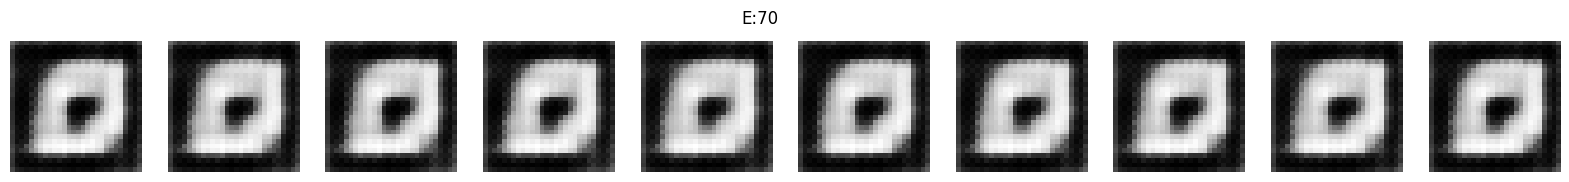

71회: 판별_loss(re):0.07726890593767166, 판별_loss(g):0.06324299424886703, GAN_loss:4.04928731918335
72회: 판별_loss(re):0.06730488687753677, 판별_loss(g):0.062374427914619446, GAN_loss:4.153738021850586
73회: 판별_loss(re):0.07089017331600189, 판별_loss(g):0.06731916964054108, GAN_loss:4.143037796020508
74회: 판별_loss(re):0.0895153284072876, 판별_loss(g):0.11914307624101639, GAN_loss:4.579248428344727
75회: 판별_loss(re):0.1820429265499115, 판별_loss(g):0.2281065732240677, GAN_loss:5.188264846801758
76회: 판별_loss(re):0.36405420303344727, 판별_loss(g):0.3915216028690338, GAN_loss:5.574300289154053
77회: 판별_loss(re):0.5650355219841003, 판별_loss(g):0.345893919467926, GAN_loss:4.156362533569336
78회: 판별_loss(re):0.45798036456108093, 판별_loss(g):0.6067633628845215, GAN_loss:5.211205005645752
79회: 판별_loss(re):1.1942614316940308, 판별_loss(g):1.048153281211853, GAN_loss:3.5313379764556885
80회: 판별_loss(re):0.7125179171562195, 판별_loss(g):0.37456294894218445, GAN_loss:2.5670454502105713


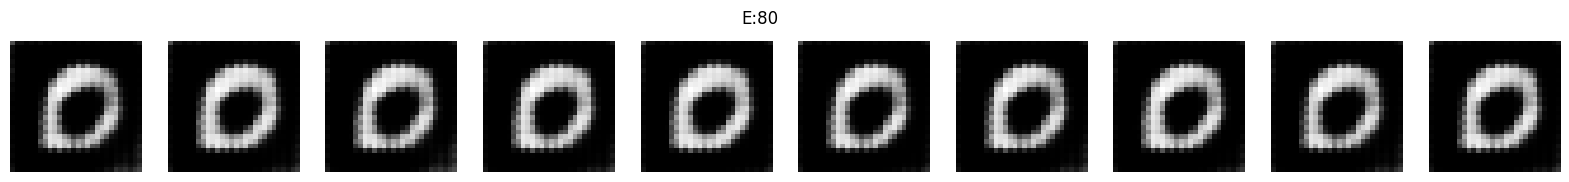

81회: 판별_loss(re):0.33879876136779785, 판별_loss(g):0.4685317277908325, GAN_loss:2.8996517658233643
82회: 판별_loss(re):0.40772131085395813, 판별_loss(g):0.37947070598602295, GAN_loss:2.759550094604492
83회: 판별_loss(re):0.2659035921096802, 판별_loss(g):0.26342469453811646, GAN_loss:3.094482183456421
84회: 판별_loss(re):0.23861491680145264, 판별_loss(g):0.21422022581100464, GAN_loss:3.17008638381958
85회: 판별_loss(re):0.1912616640329361, 판별_loss(g):0.1816963255405426, GAN_loss:3.3571105003356934
86회: 판별_loss(re):0.207331582903862, 판별_loss(g):0.21687811613082886, GAN_loss:3.4777774810791016
87회: 판별_loss(re):0.2377198487520218, 판별_loss(g):0.2448418140411377, GAN_loss:3.5713698863983154
88회: 판별_loss(re):0.282743364572525, 판별_loss(g):0.3139730989933014, GAN_loss:3.7341408729553223
89회: 판별_loss(re):0.36865729093551636, 판별_loss(g):0.407664030790329, GAN_loss:3.7761917114257812
90회: 판별_loss(re):0.4732303023338318, 판별_loss(g):0.5178484320640564, GAN_loss:3.842346429824829


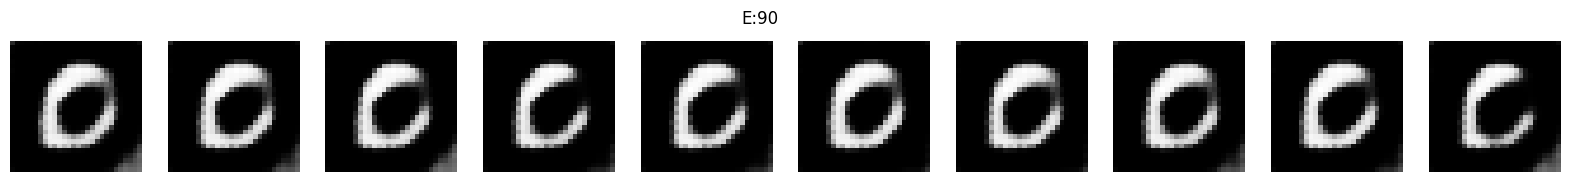

91회: 판별_loss(re):0.6197482943534851, 판별_loss(g):0.5803652405738831, GAN_loss:3.5338947772979736
92회: 판별_loss(re):0.5764878988265991, 판별_loss(g):0.42026811838150024, GAN_loss:3.019801616668701
93회: 판별_loss(re):0.43121862411499023, 판별_loss(g):0.41203513741493225, GAN_loss:3.188126802444458
94회: 판별_loss(re):0.4991135001182556, 판별_loss(g):0.403751939535141, GAN_loss:2.9740748405456543
95회: 판별_loss(re):0.43573668599128723, 판별_loss(g):0.3602966070175171, GAN_loss:2.9918911457061768
96회: 판별_loss(re):0.42978689074516296, 판별_loss(g):0.36074796319007874, GAN_loss:2.9673831462860107
97회: 판별_loss(re):0.3969234228134155, 판별_loss(g):0.2966526448726654, GAN_loss:2.8639285564422607
98회: 판별_loss(re):0.368039608001709, 판별_loss(g):0.3408151865005493, GAN_loss:3.0514698028564453
99회: 판별_loss(re):0.37931352853775024, 판별_loss(g):0.2512384355068207, GAN_loss:2.7977354526519775
100회: 판별_loss(re):0.3091682195663452, 판별_loss(g):0.3041323721408844, GAN_loss:3.0406010150909424


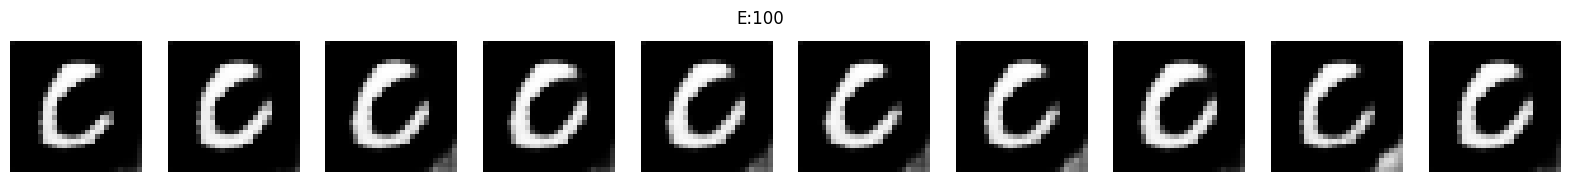

101회: 판별_loss(re):0.32480230927467346, 판별_loss(g):0.22227977216243744, GAN_loss:2.847151279449463
102회: 판별_loss(re):0.28207117319107056, 판별_loss(g):0.2916797995567322, GAN_loss:3.054962396621704
103회: 판별_loss(re):0.2982850968837738, 판별_loss(g):0.21806742250919342, GAN_loss:2.96687388420105
104회: 판별_loss(re):0.2674802541732788, 판별_loss(g):0.25692567229270935, GAN_loss:3.052964925765991
105회: 판별_loss(re):0.2746545374393463, 판별_loss(g):0.2155689150094986, GAN_loss:2.961944103240967
106회: 판별_loss(re):0.24541161954402924, 판별_loss(g):0.24770696461200714, GAN_loss:3.1151554584503174
107회: 판별_loss(re):0.24950723350048065, 판별_loss(g):0.20332883298397064, GAN_loss:3.081730604171753
108회: 판별_loss(re):0.24673013389110565, 판별_loss(g):0.24342206120491028, GAN_loss:3.083608627319336
109회: 판별_loss(re):0.2556147277355194, 판별_loss(g):0.2389303743839264, GAN_loss:3.127131462097168
110회: 판별_loss(re):0.24436983466148376, 판별_loss(g):0.20759592950344086, GAN_loss:3.059297800064087


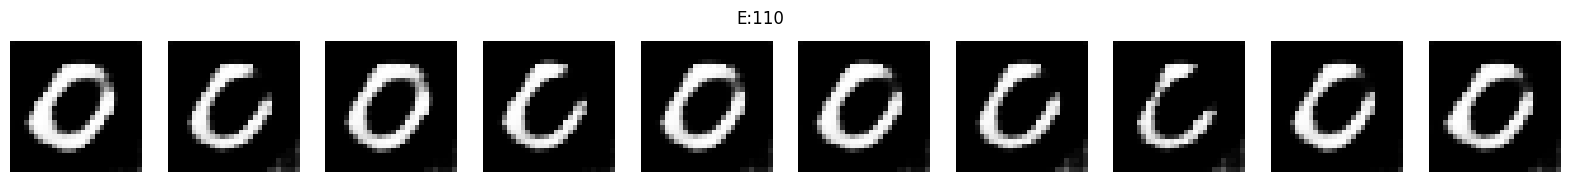

111회: 판별_loss(re):0.24076296389102936, 판별_loss(g):0.25537052750587463, GAN_loss:3.2140374183654785
112회: 판별_loss(re):0.2599515914916992, 판별_loss(g):0.21234501898288727, GAN_loss:3.1169636249542236
113회: 판별_loss(re):0.23149040341377258, 판별_loss(g):0.25102677941322327, GAN_loss:3.254467010498047
114회: 판별_loss(re):0.24460014700889587, 판별_loss(g):0.2173977643251419, GAN_loss:3.237250804901123
115회: 판별_loss(re):0.23398816585540771, 판별_loss(g):0.27273285388946533, GAN_loss:3.3685498237609863
116회: 판별_loss(re):0.2879076898097992, 판별_loss(g):0.30569541454315186, GAN_loss:3.3960559368133545
117회: 판별_loss(re):0.3382665514945984, 판별_loss(g):0.37238800525665283, GAN_loss:3.358267068862915
118회: 판별_loss(re):0.3713169991970062, 판별_loss(g):0.39093834161758423, GAN_loss:3.3070425987243652
119회: 판별_loss(re):0.41855525970458984, 판별_loss(g):0.4718617796897888, GAN_loss:3.337660789489746
120회: 판별_loss(re):0.5718615055084229, 판별_loss(g):0.6236580014228821, GAN_loss:3.2104055881500244


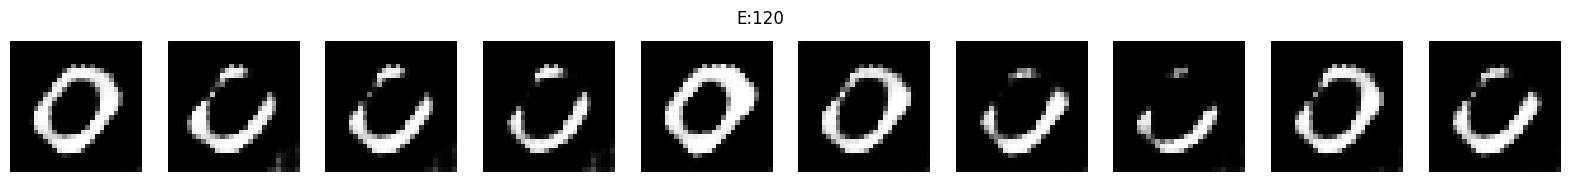

121회: 판별_loss(re):0.6311885714530945, 판별_loss(g):0.6396844387054443, GAN_loss:3.1034579277038574
122회: 판별_loss(re):0.692604660987854, 판별_loss(g):0.7193467020988464, GAN_loss:2.893082857131958
123회: 판별_loss(re):0.7119150161743164, 판별_loss(g):0.6472534537315369, GAN_loss:2.738708734512329
124회: 판별_loss(re):0.6834416389465332, 판별_loss(g):0.5949922800064087, GAN_loss:2.6182215213775635
125회: 판별_loss(re):0.6283678412437439, 판별_loss(g):0.5555559396743774, GAN_loss:2.5130856037139893
126회: 판별_loss(re):0.6267812252044678, 판별_loss(g):0.5524469614028931, GAN_loss:2.549168109893799
127회: 판별_loss(re):0.700173020362854, 판별_loss(g):0.5854512453079224, GAN_loss:2.492767572402954
128회: 판별_loss(re):0.5887780785560608, 판별_loss(g):0.48701122403144836, GAN_loss:2.503633975982666
129회: 판별_loss(re):0.6498610377311707, 판별_loss(g):0.5093902945518494, GAN_loss:2.3904900550842285
130회: 판별_loss(re):0.6060608625411987, 판별_loss(g):0.45684677362442017, GAN_loss:2.350975275039673


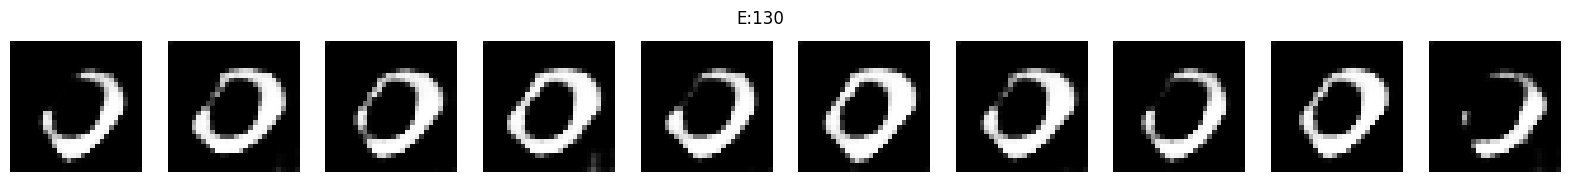

131회: 판별_loss(re):0.598601758480072, 판별_loss(g):0.5198488235473633, GAN_loss:2.451092004776001
132회: 판별_loss(re):0.6238152980804443, 판별_loss(g):0.4689749479293823, GAN_loss:2.4588842391967773
133회: 판별_loss(re):0.578058123588562, 판별_loss(g):0.4427463412284851, GAN_loss:2.4542717933654785
134회: 판별_loss(re):0.5426849126815796, 판별_loss(g):0.42845720052719116, GAN_loss:2.4827280044555664
135회: 판별_loss(re):0.585482120513916, 판별_loss(g):0.4556434750556946, GAN_loss:2.440420389175415
136회: 판별_loss(re):0.5101402997970581, 판별_loss(g):0.3864993453025818, GAN_loss:2.5198423862457275
137회: 판별_loss(re):0.5809022188186646, 판별_loss(g):0.4484733045101166, GAN_loss:2.5008437633514404
138회: 판별_loss(re):0.5518141984939575, 판별_loss(g):0.3999212384223938, GAN_loss:2.4390225410461426
139회: 판별_loss(re):0.5025303959846497, 판별_loss(g):0.3737368881702423, GAN_loss:2.4462854862213135
140회: 판별_loss(re):0.46358194947242737, 판별_loss(g):0.38079214096069336, GAN_loss:2.5279603004455566


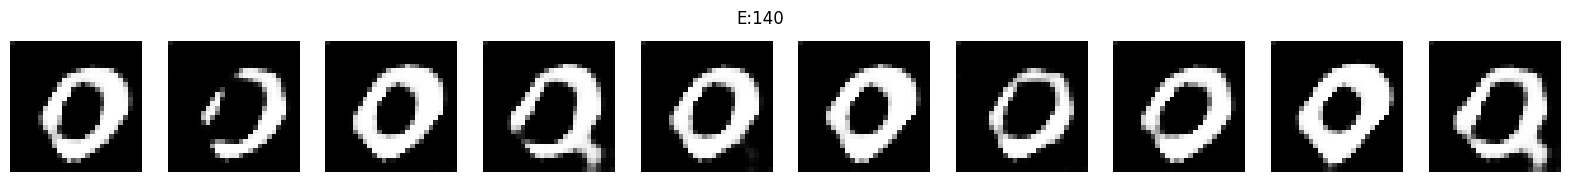

141회: 판별_loss(re):0.5090237855911255, 판별_loss(g):0.35074564814567566, GAN_loss:2.457793712615967
142회: 판별_loss(re):0.41959214210510254, 판별_loss(g):0.32311874628067017, GAN_loss:2.443136215209961
143회: 판별_loss(re):0.38143789768218994, 판별_loss(g):0.302834153175354, GAN_loss:2.6276872158050537
144회: 판별_loss(re):0.3666946291923523, 판별_loss(g):0.2631570100784302, GAN_loss:2.613865852355957
145회: 판별_loss(re):0.3456418216228485, 판별_loss(g):0.25434309244155884, GAN_loss:2.628714084625244
146회: 판별_loss(re):0.283204048871994, 판별_loss(g):0.22611400485038757, GAN_loss:2.7039215564727783
147회: 판별_loss(re):0.28144320845603943, 판별_loss(g):0.2113465815782547, GAN_loss:2.7103800773620605
148회: 판별_loss(re):0.23391832411289215, 판별_loss(g):0.19548235833644867, GAN_loss:2.830418825149536
149회: 판별_loss(re):0.242234006524086, 판별_loss(g):0.2000296711921692, GAN_loss:2.797006130218506
150회: 판별_loss(re):0.2355380356311798, 판별_loss(g):0.19300439953804016, GAN_loss:2.8220653533935547


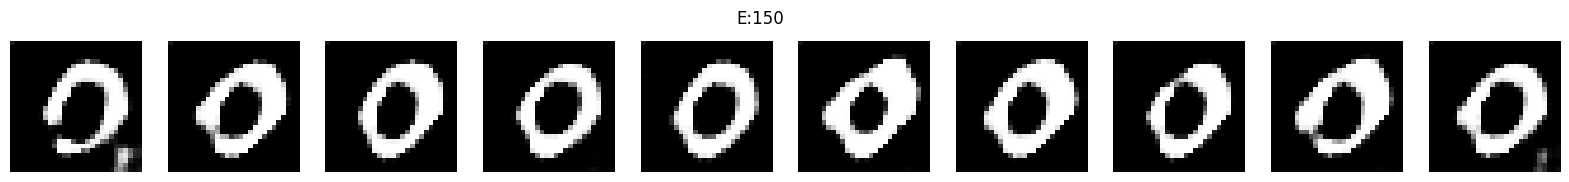

151회: 판별_loss(re):0.23008687794208527, 판별_loss(g):0.1928221583366394, GAN_loss:2.891901731491089
152회: 판별_loss(re):0.25185656547546387, 판별_loss(g):0.2051428258419037, GAN_loss:2.914083957672119
153회: 판별_loss(re):0.22833456099033356, 판별_loss(g):0.19532442092895508, GAN_loss:2.9269793033599854
154회: 판별_loss(re):0.24364005029201508, 판별_loss(g):0.2257450670003891, GAN_loss:2.98437762260437
155회: 판별_loss(re):0.24734824895858765, 판별_loss(g):0.21938283741474152, GAN_loss:3.027240037918091
156회: 판별_loss(re):0.27270618081092834, 판별_loss(g):0.23914359509944916, GAN_loss:2.911141872406006
157회: 판별_loss(re):0.2755998373031616, 판별_loss(g):0.2715194523334503, GAN_loss:2.876572370529175
158회: 판별_loss(re):0.29839959740638733, 판별_loss(g):0.27288976311683655, GAN_loss:2.943406820297241
159회: 판별_loss(re):0.31936562061309814, 판별_loss(g):0.2866252064704895, GAN_loss:2.8510334491729736
160회: 판별_loss(re):0.36738747358322144, 판별_loss(g):0.36906003952026367, GAN_loss:2.854872465133667


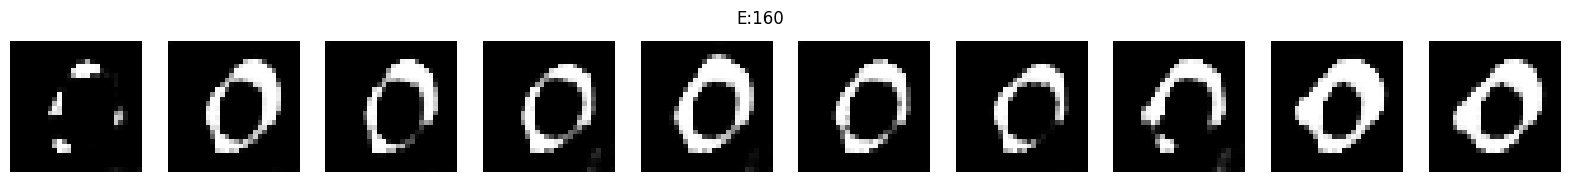

161회: 판별_loss(re):0.38540658354759216, 판별_loss(g):0.29033443331718445, GAN_loss:2.783583879470825
162회: 판별_loss(re):0.4046562612056732, 판별_loss(g):0.34046247601509094, GAN_loss:2.6966326236724854
163회: 판별_loss(re):0.451251357793808, 판별_loss(g):0.3866148889064789, GAN_loss:2.746387004852295
164회: 판별_loss(re):0.42926865816116333, 판별_loss(g):0.31480851769447327, GAN_loss:2.7136247158050537
165회: 판별_loss(re):0.3949703276157379, 판별_loss(g):0.3470953106880188, GAN_loss:2.736656904220581
166회: 판별_loss(re):0.41941627860069275, 판별_loss(g):0.32505708932876587, GAN_loss:2.77235746383667
167회: 판별_loss(re):0.41355761885643005, 판별_loss(g):0.3414885401725769, GAN_loss:2.6983015537261963
168회: 판별_loss(re):0.3759535253047943, 판별_loss(g):0.31409770250320435, GAN_loss:2.8042984008789062
169회: 판별_loss(re):0.3796824812889099, 판별_loss(g):0.3243061304092407, GAN_loss:2.8011772632598877
170회: 판별_loss(re):0.36569687724113464, 판별_loss(g):0.3463897109031677, GAN_loss:2.7974884510040283


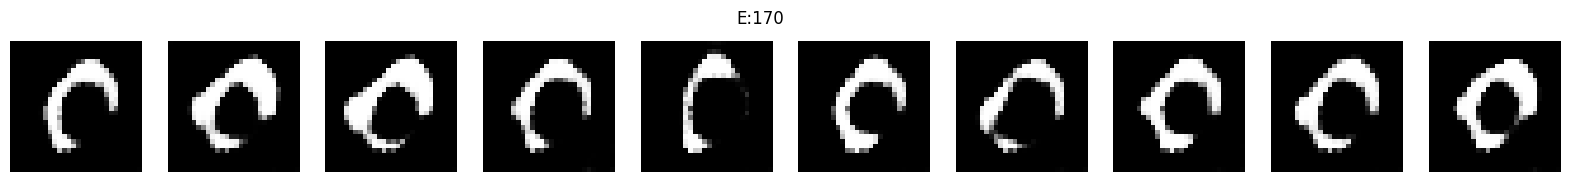

171회: 판별_loss(re):0.3804149925708771, 판별_loss(g):0.319648802280426, GAN_loss:2.8051817417144775
172회: 판별_loss(re):0.3698289692401886, 판별_loss(g):0.3463740646839142, GAN_loss:2.7777984142303467
173회: 판별_loss(re):0.34113574028015137, 판별_loss(g):0.30645129084587097, GAN_loss:2.9179224967956543
174회: 판별_loss(re):0.35095933079719543, 판별_loss(g):0.33406224846839905, GAN_loss:2.8492844104766846
175회: 판별_loss(re):0.41050460934638977, 판별_loss(g):0.38502827286720276, GAN_loss:2.7659945487976074
176회: 판별_loss(re):0.36087706685066223, 판별_loss(g):0.3736681342124939, GAN_loss:2.9909987449645996
177회: 판별_loss(re):0.40830570459365845, 판별_loss(g):0.36347901821136475, GAN_loss:2.8861961364746094
178회: 판별_loss(re):0.37028926610946655, 판별_loss(g):0.3701653480529785, GAN_loss:2.934903383255005
179회: 판별_loss(re):0.3792518079280853, 판별_loss(g):0.3557816743850708, GAN_loss:2.920166015625
180회: 판별_loss(re):0.4269982874393463, 판별_loss(g):0.4013898968696594, GAN_loss:2.7837677001953125


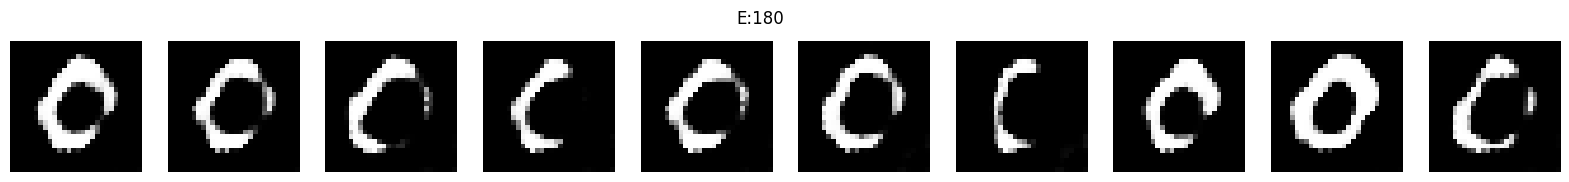

181회: 판별_loss(re):0.3432832956314087, 판별_loss(g):0.3457733690738678, GAN_loss:2.8984768390655518
182회: 판별_loss(re):0.40058979392051697, 판별_loss(g):0.33185672760009766, GAN_loss:2.8802342414855957
183회: 판별_loss(re):0.37483739852905273, 판별_loss(g):0.3821922540664673, GAN_loss:2.892051935195923
184회: 판별_loss(re):0.3854018747806549, 판별_loss(g):0.34942740201950073, GAN_loss:2.829702138900757
185회: 판별_loss(re):0.39026564359664917, 판별_loss(g):0.38844284415245056, GAN_loss:2.859663486480713
186회: 판별_loss(re):0.398233562707901, 판별_loss(g):0.3472466468811035, GAN_loss:2.8012759685516357
187회: 판별_loss(re):0.38407766819000244, 판별_loss(g):0.4260249137878418, GAN_loss:2.900118827819824
188회: 판별_loss(re):0.429380863904953, 판별_loss(g):0.42626944184303284, GAN_loss:2.830371618270874
189회: 판별_loss(re):0.4517374336719513, 판별_loss(g):0.4332488477230072, GAN_loss:2.8244659900665283
190회: 판별_loss(re):0.469239205121994, 판별_loss(g):0.506899356842041, GAN_loss:2.856288194656372


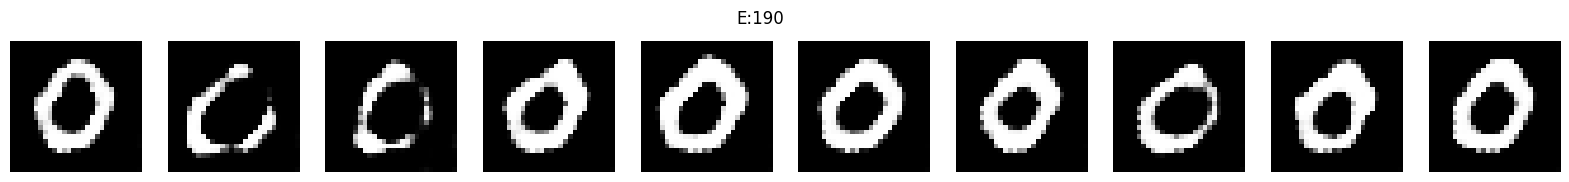

191회: 판별_loss(re):0.5364895462989807, 판별_loss(g):0.5590479969978333, GAN_loss:2.7331583499908447
192회: 판별_loss(re):0.5903869867324829, 판별_loss(g):0.5866053700447083, GAN_loss:2.636474609375
193회: 판별_loss(re):0.6033600568771362, 판별_loss(g):0.5738149881362915, GAN_loss:2.497770309448242
194회: 판별_loss(re):0.6448556780815125, 판별_loss(g):0.6524639129638672, GAN_loss:2.548044443130493
195회: 판별_loss(re):0.6200330257415771, 판별_loss(g):0.5962557792663574, GAN_loss:2.5251574516296387
196회: 판별_loss(re):0.6345608234405518, 판별_loss(g):0.6464419364929199, GAN_loss:2.4638004302978516
197회: 판별_loss(re):0.7002198100090027, 판별_loss(g):0.678147554397583, GAN_loss:2.2990188598632812
198회: 판별_loss(re):0.6575356721878052, 판별_loss(g):0.6455617547035217, GAN_loss:2.237231969833374
199회: 판별_loss(re):0.6368164420127869, 판별_loss(g):0.5945800542831421, GAN_loss:2.2040603160858154
200회: 판별_loss(re):0.6546347141265869, 판별_loss(g):0.6445132493972778, GAN_loss:2.078958511352539


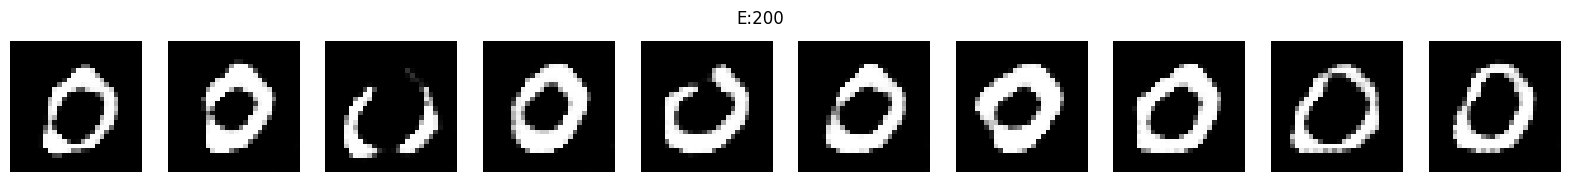

In [ ]:
D = make_cgan_di_m(in_shape,n_class)
G = make_cgan_g_m(c_size)
GAN = make_cgan_m(G,D,c_size)
train(G,D,GAN,data,label,c_size,bc_size,ep,1)

Q2. 3채널 이미지를 이용하여 CGAN을 구현 하시오.